In [1]:
# Inspired from https://github.com/giacomo-artoni/cmpp/blob/master/Lecture2-BayesianInference/SlideContents.ipynb

%matplotlib inline
import collections
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, invgamma
import seaborn as sns
sns.set(style='ticks')

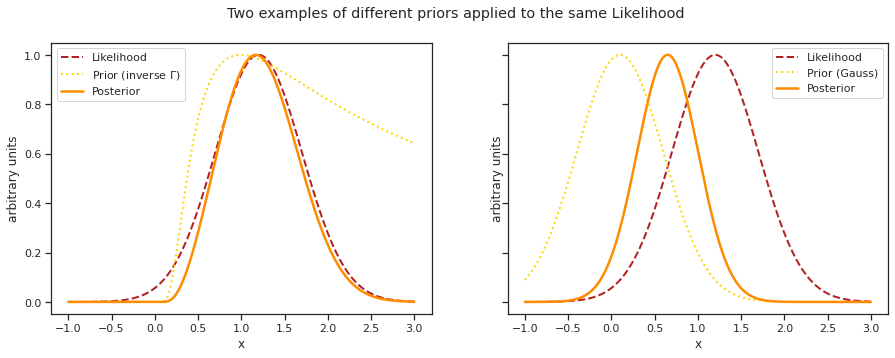

In [2]:
mu, sigma = 1.2, 0.5

# Setting max value of distribution to 1.0
def max_to_one(ds):
    return ds / max(ds)

# Seeting up range
x_vals = np.arange(-1, 3, 0.001)

# Setting up likelihood: a gaussian with mean mu and standard deviation sigma
y_lh = max_to_one(norm.pdf(x_vals, mu, sigma))

# Seeting up priors
# Inverted Gamma function
y_prior_igamma = max_to_one(invgamma.pdf(x_vals, 0.01))
# Gaussian with mean 0.1 and standard deviation 0.5
y_prior_gauss = max_to_one(norm.pdf(x_vals, 0.1, 0.5))

# Obtaining the posterior distributions
y_posterior_igamma = max_to_one(y_lh * y_prior_igamma)
y_posterior_gauss = max_to_one(y_lh * y_prior_gauss)

# Plotting

plot_det = collections.namedtuple('plot_det', 'data, label, style, width, color')
lh_det = plot_det(data=y_lh, label='Likelihood', style='--', width=2, color='firebrick') 

igamma_case = [
    lh_det,
    plot_det(data=y_prior_igamma, label='Prior (inverse $\Gamma$)', style=':', width=2, color='gold'),
    plot_det(data=y_posterior_igamma, label='Posterior', style='-', width=2.5, color='darkorange'),
]
gauss_case = [
    lh_det,
    plot_det(data=y_prior_gauss, label='Prior (Gauss)', style=':', width=2, color='gold'),
    plot_det(data=y_posterior_gauss, label='Posterior', style='-', width=2.5, color='darkorange'),
]

fig, (igamma_fig, gauss_fig) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Two examples of different priors applied to the same Likelihood')

for p_det in igamma_case:
    igamma_fig.plot(x_vals, p_det.data, color=p_det.color, lw=p_det.width, ls=p_det.style, label=p_det.label)
    
for p_det in gauss_case:
    gauss_fig.plot(x_vals, p_det.data, color=p_det.color, lw=p_det.width, ls=p_det.style, label=p_det.label)
    
plt.setp(igamma_fig, xlabel='x')
plt.setp(igamma_fig, ylabel='arbitrary units')
igamma_fig.legend()

plt.setp(gauss_fig, xlabel='x')
plt.setp(gauss_fig, ylabel='arbitrary units')
gauss_fig.legend();